AIM: Classify SMS messages as spam or ham using the Naive Bayes algorithm. Use text preprocessing & evaluate model performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

In [ ]:
print("Dataset Sample:")
print(df.head())


Dataset Sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Convert labels: spam=1, ham=0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test_tfidf)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



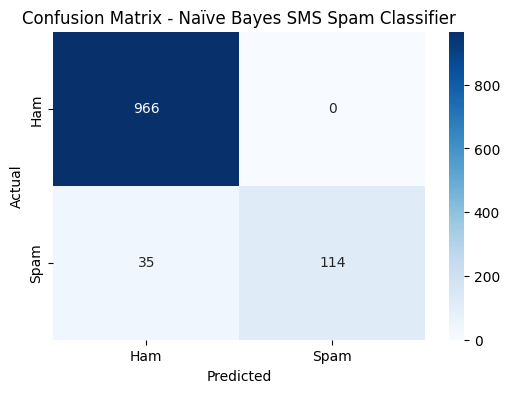

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix - Naïve Bayes SMS Spam Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()